In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# df=pd.read_csv('/content/drive/MyDrive/Tuwaiq/Week 2/2 - Foundations of Machine Learning/1- Introduction to Machine Learning/homework/Salary Data.csv')

df = pd.read_csv('/content/drive/MyDrive/Tuwaiq/Week 2/T5_Phase4/Data_Analysis/Data/Salary_Data_3.csv')

# Data Exploration

In [8]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [9]:
df.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1971,50.0,Male,PhD,Senior Project Engineer,19.0,200000.0
5140,25.0,Male,Bachelor's Degree,Junior Software Engineer,1.0,55000.0
5404,28.0,Female,PhD,Data Scientist,5.0,100000.0
3311,36.0,Male,PhD,Senior Data Scientist,12.0,170000.0
5490,26.0,Female,Bachelor's Degree,Graphic Designer,2.0,50000.0
1744,29.0,Female,Master's Degree,Back end Developer,3.0,90000.0
5424,31.0,Female,Bachelor's Degree,Marketing Coordinator,4.0,65000.0
3515,30.0,Male,High School,Junior HR Coordinator,2.0,33000.0
3268,34.0,Male,Master's Degree,Data Scientist,9.0,140000.0
5521,34.0,Male,PhD,Research Director,11.0,170000.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education_Level      6701 non-null   object 
 3   Job_Title            6702 non-null   object 
 4   Years_of_Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


# Cleaning

In [14]:
df.rename(columns={'Education Level':'Education_Level' , 'Years of Experience' : 'Years_of_Experience',
                   'Job Title': 'Job_Title'
                   },inplace=True)

In [20]:
df['Education_Level'].replace( "Bachelor's Degree" , "Bachelor's" , inplace= True)
df['Education_Level'].replace( "Master's Degree" , "Master's" , inplace= True)
df['Education_Level'].replace( "phD" , "PhD" , inplace= True)

## Check duplication

In [24]:
df.duplicated().sum()

4913

In [25]:
df.drop_duplicates(inplace=True)

## Outliers detection

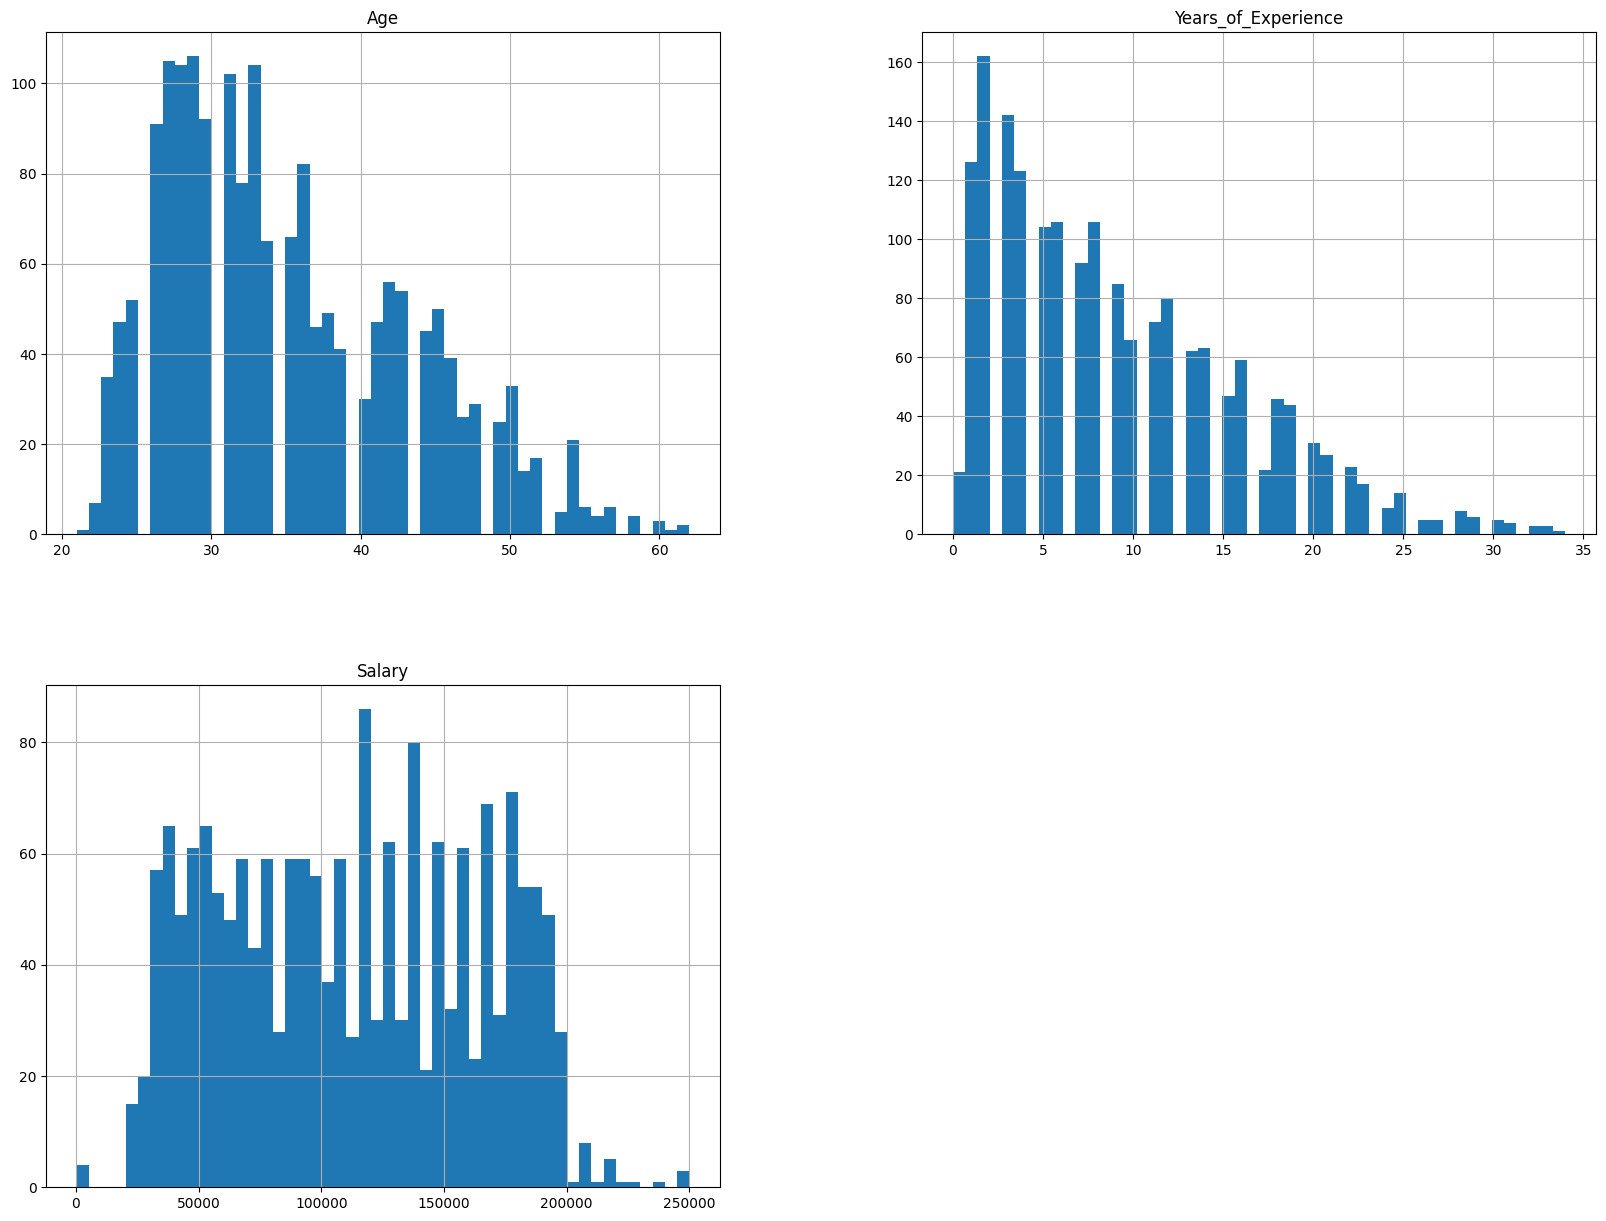

In [26]:
df.hist(bins=50,figsize=(20,15))
plt.show()

### Salary outlier

<Axes: xlabel='Salary'>

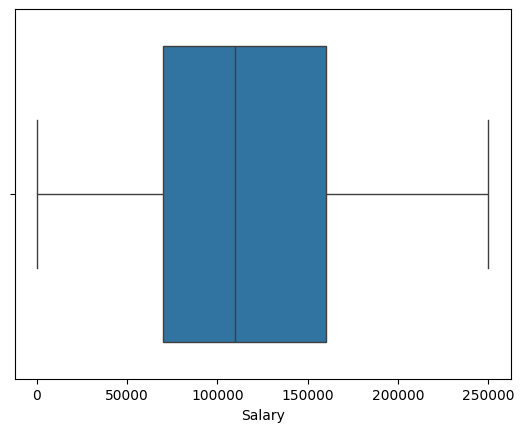

In [28]:
# Salary
sns.boxplot(x=df['Salary'])

In [29]:
# check weather 250000 is normal salary, in the case it is not normal (outliers) we will drop the rows, beacause it is the feature we want to predict

df[df['Salary'] >= 200000]

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
4,52.0,Male,Master's,Director,20.0,200000.0
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
53,47.0,Male,Master's,VP of Finance,19.0,200000.0
83,52.0,Male,PhD,Chief Technology Officer,24.0,250000.0
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0
1211,61.0,Male,PhD,Software Engineer Manager,20.0,200000.0
1225,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
1236,62.0,Male,PhD,Software Engineer Manager,20.0,200000.0
1269,58.0,Male,PhD,Software Engineer Manager,17.0,200000.0
1408,52.0,Male,PhD,Software Engineer Manager,18.0,200000.0


In [30]:
# salary = 350 it is not normal , i will drop the raw
df[df['Salary'] <= 10000]

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0
1890,25.0,Female,Bachelor's,Front end Developer,1.0,550.0
2654,23.0,Male,PhD,Software Engineer Manager,1.0,579.0
4633,31.0,Female,Bachelor's,Junior HR Coordinator,4.0,500.0


In [31]:
df.drop(df[df['Salary'] <= 10000].index, inplace=True)


## Correlation

In [32]:
corr_matrix= df.corr(numeric_only=True)
corr_matrix

,Age,Years_of_Experience,Salary
Age,1.000000,0.935957,0.767021
Years_of_Experience,0.935957,1.000000,0.818937
Salary,0.767021,0.818937,1.000000


<Axes: >

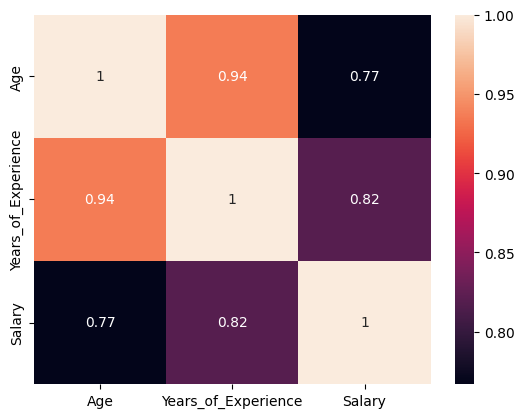

In [33]:
sns.heatmap(corr_matrix, annot=True)

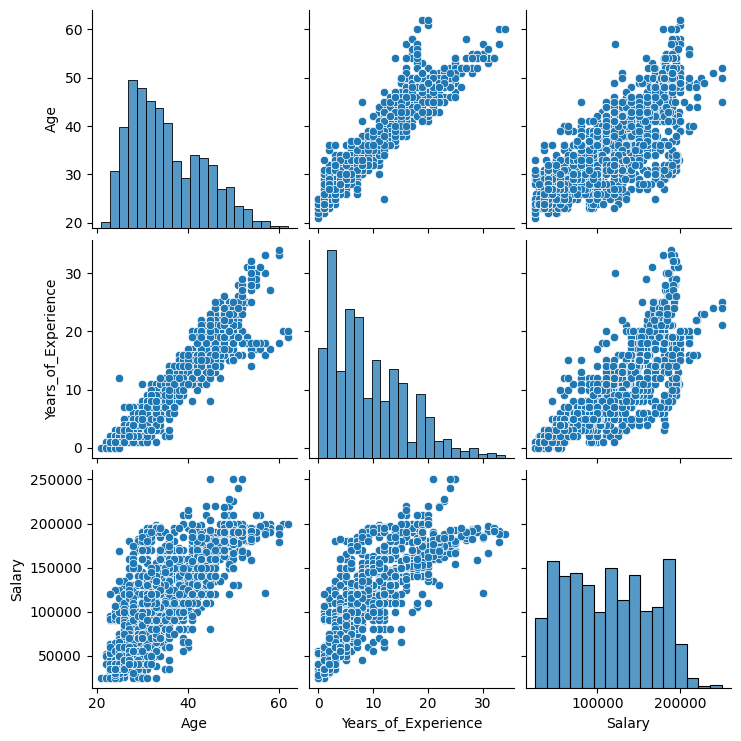

In [34]:
sns.pairplot(df)

## Handling null values

In [35]:
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's,Social M,NaN,NaN
6455,36.0,Male,Bachelor's,Sales Director,6.0,NaN


In [36]:
df.isnull().sum()

Age                    1
Gender                 1
Education_Level        2
Job_Title              1
Years_of_Experience    2
Salary                 4
dtype: int64

In [37]:
# In salary column, i will drop the column that contain null values
df.dropna(subset=["Salary"], inplace=True)

In [41]:
df.dropna(subset=["Education_Level"], inplace=True)

In [42]:
df.isnull().sum()

Age                    0
Gender                 0
Education_Level        0
Job_Title              0
Years_of_Experience    0
Salary                 0
dtype: int64

# Prepare the Data for Machine Learning Algorithms

## Splitting data

In [43]:
df.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [48]:
from sklearn.model_selection import train_test_split

X = df.drop("Salary", axis=1) # drop labels for training set
y = df["Salary"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# train_set, test_set = train_test_split(df, test_size=0.2, random_state=6)

## Categorical Data

In [45]:
X_train.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience
346,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0
187,34.0,Male,Bachelor's,Senior Quality Assurance Analyst,9.0
27,24.0,Male,Bachelor's,Junior Developer,1.0
293,35.0,Male,Bachelor's,Senior Business Development Manager,7.0
73,28.0,Male,Bachelor's,Technical Support Specialist,2.0


In [46]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(sparse=False)


# X_train_encoded = encoder.fit_transform(X_train[['Gender']])
# X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['Gender']), index=X_train.index)
# X_train = pd.concat([X_train.drop('Gender', axis=1), X_train_encoded_df], axis=1)


# X_test_encoded = encoder.transform(X_test[['Gender']])
# X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['Gender']), index=X_test.index)
# X_test = pd.concat([X_test.drop('Gender', axis=1), X_test_encoded_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [49]:
X_train

,Age,Gender,Education_Level,Job_Title,Years_of_Experience
305,36.0,Male,Bachelor's,Senior Business Analyst,8.0
104,39.0,Female,Master's,Senior Project Coordinator,13.0
238,33.0,Female,Bachelor's,Junior Operations Analyst,5.0
5653,36.0,Female,PhD,Research Scientist,12.0
1773,51.0,Male,PhD,Senior Project Engineer,19.0
...,...,...,...,...,...
2278,34.0,Male,Master's,Data Analyst,8.0
2644,33.0,Female,Master's,Full Stack Engineer,11.0
3147,41.0,Female,PhD,Senior Data Scientist,16.0
237,45.0,Male,Master's,Senior Software Developer,16.0


In [50]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

X_train['Education_Level_encoded'] = ordinal_encoder.fit_transform(X_train[['Education_Level']])
X_test['Education_Level_encoded'] = ordinal_encoder.fit_transform(X_test[['Education_Level']])


X_train['Gender_ecoded'] = label_encoder.fit_transform(X_train[['Gender']])
X_test['Gender_ecoded'] = label_encoder.fit_transform(X_test[['Gender']])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_train['Job_Title_encoded'] = label_encoder.fit_transform(X_train['Job_Title'])
X_test['Job_Title_encoded'] = label_encoder.fit_transform(X_test['Job_Title'])

## Scalling

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train['Age_scalled'] = scaler.fit_transform(X_train[['Age']])
X_test['Age_scalled'] = scaler.fit_transform(X_test[['Age']])



X_train['Years_of_Experience_scalled'] = scaler.fit_transform(X_train[['Years_of_Experience']])
X_test['Years_of_Experience_scalled'] = scaler.fit_transform(X_test[['Years_of_Experience']])

In [54]:
X_train.drop(['Age','Gender','Education_Level','Job_Title', 'Years_of_Experience'],axis=1,inplace=True)
X_test.drop(['Age','Gender','Education_Level','Job_Title', 'Years_of_Experience'],axis=1,inplace=True)

In [55]:
X_train

,Education_Level_encoded,Gender_ecoded,Job_Title_encoded,Age_scalled,Years_of_Experience_scalled
305,0.0,1,115,0.365854,0.235294
104,2.0,0,146,0.439024,0.382353
238,0.0,0,71,0.292683,0.147059
5653,3.0,0,105,0.365854,0.352941
1773,3.0,1,147,0.731707,0.558824
...,...,...,...,...,...
2278,2.0,1,17,0.317073,0.235294
2644,2.0,0,41,0.292683,0.323529
3147,3.0,0,120,0.487805,0.470588
237,2.0,1,154,0.585366,0.470588


# ML Model

In [56]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [57]:
score = model.score(X_test, y_test)
score

0.7036828433002271

In [58]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
score1 = model1.score(X_test, y_test)
score1

0.05322128851540616

In [60]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()

model2.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
score2 = model2.score(X_test, y_test)
score2

0.7313837761199844

In [63]:
model2.predict(X_test)


# # if we want to predict real data:

# new_data = [['PhD', 'Software Engineer' , 32 ,15, 'Female' ]]

# #new_data_processed = pip.transform(new_data)

# #model2.predict(new_data_processed)


### Another aproch (from teacher ali)

In [ ]:
from sklearn import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler



num_pip = Pipeline([('scaler', StandardScaler())])
cat_pip = Pipeline([('encoder', OrdinalEncoder())])

In [ ]:
from sklearn.compose import ColumnTransformer


ColumnTransformer?

In [ ]:
pipe = ColumnTransformer([
    ('num', num_pip, ['Age', 'Years_of_Experience']),
    ('cat', cat_pip, ['Gender', 'Education_Level', 'Job_Title'])
])

In [ ]:
pip.fit_transform(X_train)